# <center> House Prices - Advanced Regression ‚ôæ with Julia üòé </center>

In [1]:
using Pkg

Les donn√©es et leur description sont acc√©ssibles ici: <a href="https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data"> house-prices-advanced-regression-techniques </a>


In [2]:
using CSV
using Flux
using Conda
using Impute
using StatsBase
using DataFrames
using StatsPlots
using ScikitLearn
using MLDataUtils
using DecisionTree
using Lathe.preprocess: TrainTestSplit

* ##### Importation des donn√©es

In [3]:
df_train = CSV.read("data/train.csv", DataFrame);
df_test = CSV.read("data/test.csv", DataFrame);

* ##### Cinq premi√®res lignes du jeu de donn√©es 

In [4]:
head(df_train)

6√ó81 DataFrame. Omitted printing of 75 columns
‚îÇ Row ‚îÇ Id    ‚îÇ MSSubClass ‚îÇ MSZoning ‚îÇ LotFrontage ‚îÇ LotArea ‚îÇ Street ‚îÇ
‚îÇ     ‚îÇ Int64 ‚îÇ Int64      ‚îÇ String   ‚îÇ String      ‚îÇ Int64   ‚îÇ String ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ 1   ‚îÇ 1     ‚îÇ 60         ‚îÇ RL       ‚îÇ 65          ‚îÇ 8450    ‚îÇ Pave   ‚îÇ
‚îÇ 2   ‚îÇ 2     ‚îÇ 20         ‚îÇ RL       ‚îÇ 80          ‚îÇ 9600    ‚îÇ Pave   ‚îÇ
‚îÇ 3   ‚îÇ 3     ‚îÇ 60         ‚îÇ RL       ‚îÇ 68          ‚îÇ 11250   ‚îÇ Pave   ‚îÇ
‚îÇ 4   ‚îÇ 4     ‚îÇ 70         ‚îÇ RL       ‚îÇ 60          ‚îÇ 9550    ‚îÇ Pave   ‚îÇ
‚îÇ 5   ‚îÇ 5     ‚îÇ 60         ‚îÇ RL       ‚îÇ 84          ‚îÇ 14260   ‚îÇ Pave   ‚îÇ
‚îÇ 6   ‚îÇ 6     ‚îÇ 50         ‚îÇ RL       ‚îÇ 85          ‚îÇ 14115   ‚îÇ Pave   ‚îÇ

* ##### Cinq derni√®res lignes du jeu de donn√©es 

In [5]:
tail(df_test)

6√ó80 DataFrame. Omitted printing of 74 columns
‚îÇ Row ‚îÇ Id    ‚îÇ MSSubClass ‚îÇ MSZoning ‚îÇ LotFrontage ‚îÇ LotArea ‚îÇ Street ‚îÇ
‚îÇ     ‚îÇ Int64 ‚îÇ Int64      ‚îÇ String   ‚îÇ String      ‚îÇ Int64   ‚îÇ String ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ 1   ‚îÇ 2914  ‚îÇ 160        ‚îÇ RM       ‚îÇ 21          ‚îÇ 1526    ‚îÇ Pave   ‚îÇ
‚îÇ 2   ‚îÇ 2915  ‚îÇ 160        ‚îÇ RM       ‚îÇ 21          ‚îÇ 1936    ‚îÇ Pave   ‚îÇ
‚îÇ 3   ‚îÇ 2916  ‚îÇ 160        ‚îÇ RM       ‚îÇ 21          ‚îÇ 1894    ‚îÇ Pave   ‚îÇ
‚îÇ 4   ‚îÇ 2917  ‚îÇ 20         ‚îÇ RL       ‚îÇ 160         ‚îÇ 20000   ‚îÇ Pave   ‚îÇ
‚îÇ 5   ‚îÇ 2918  ‚îÇ 85         ‚îÇ RL       ‚îÇ 62          ‚îÇ 10441   ‚îÇ Pave   ‚îÇ
‚îÇ 6   ‚îÇ 2919  ‚îÇ 60         ‚îÇ RL       ‚îÇ 74          ‚îÇ 9627    ‚îÇ Pave   ‚îÇ

* ##### Suppression de la variable ID

La suppression d'une variable se fait en *r√©selectionnant* les variables du jeu de donn√©es except√©e la variable √† supprimer. Avec *Julia*, `!` devant une fonction √† valeur de `inplace=True` en python. Il √©crase la valeur de la variable et lui assigne le r√©sultat de l'op√©ration de la fonction utilis√©e.

In [6]:
select!(df_train, Not(:Id));
select!(df_test, Not(:Id));

In [7]:
# V√©rifier le type de donn√©es retourn√©es. 
@show typeof(df_train)

# @show typeof(df_test)

typeof(df_train) = DataFrame


DataFrame

In [8]:
# Colonnes des donn√©es d'apprentissage 
names(df_train)

80-element Vector{String}:
 "MSSubClass"
 "MSZoning"
 "LotFrontage"
 "LotArea"
 "Street"
 "Alley"
 "LotShape"
 "LandContour"
 "Utilities"
 "LotConfig"
 "LandSlope"
 "Neighborhood"
 "Condition1"
 ‚ãÆ
 "3SsnPorch"
 "ScreenPorch"
 "PoolArea"
 "PoolQC"
 "Fence"
 "MiscFeature"
 "MiscVal"
 "MoSold"
 "YrSold"
 "SaleType"
 "SaleCondition"
 "SalePrice"

In [9]:
# Colonnes des donn√©es de test
names(df_test);

* ##### Division des donn√©es en groupe (les zones d'habitation)

In [10]:
gdf = groupby(df_train, :MSZoning);

In [11]:
combine(gdf, nrow, :SalePrice => mode)

5√ó3 DataFrame
‚îÇ Row ‚îÇ MSZoning ‚îÇ nrow  ‚îÇ SalePrice_mode ‚îÇ
‚îÇ     ‚îÇ String   ‚îÇ Int64 ‚îÇ Int64          ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ 1   ‚îÇ RL       ‚îÇ 1151  ‚îÇ 135000         ‚îÇ
‚îÇ 2   ‚îÇ RM       ‚îÇ 218   ‚îÇ 115000         ‚îÇ
‚îÇ 3   ‚îÇ C (all)  ‚îÇ 10    ‚îÇ 40000          ‚îÇ
‚îÇ 4   ‚îÇ FV       ‚îÇ 65    ‚îÇ 176000         ‚îÇ
‚îÇ 5   ‚îÇ RH       ‚îÇ 16    ‚îÇ 145000         ‚îÇ

In [12]:
combine(gdf, nrow,:SalePrice => maximum)

5√ó3 DataFrame
‚îÇ Row ‚îÇ MSZoning ‚îÇ nrow  ‚îÇ SalePrice_maximum ‚îÇ
‚îÇ     ‚îÇ String   ‚îÇ Int64 ‚îÇ Int64             ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ 1   ‚îÇ RL       ‚îÇ 1151  ‚îÇ 755000            ‚îÇ
‚îÇ 2   ‚îÇ RM       ‚îÇ 218   ‚îÇ 475000            ‚îÇ
‚îÇ 3   ‚îÇ C (all)  ‚îÇ 10    ‚îÇ 133900            ‚îÇ
‚îÇ 4   ‚îÇ FV       ‚îÇ 65    ‚îÇ 370878            ‚îÇ
‚îÇ 5   ‚îÇ RH       ‚îÇ 16    ‚îÇ 200000            ‚îÇ

Nous arrivons √† utiliser la moyenne `mean` et le mode `mode` de la sorte gr√¢ce au package `StatsBase` que nous avons import√©.

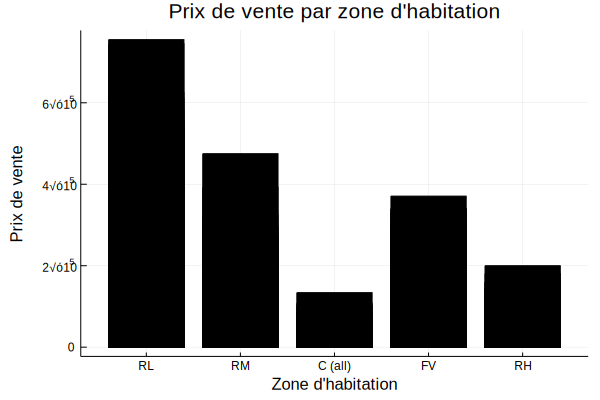

In [13]:
plot(df_train.MSZoning, 
    df_train.SalePrice,
    label="",
    seriestype = :bar, 
    title = "Prix de vente par zone d'habitation", 
    ylabel="Prix de vente",
    xlabel="Zone d'habitation",
    color=:black)

Les maisons se trouvant dans les zones d'habitation √† faible densit√© de population sont les plus demand√©es. 

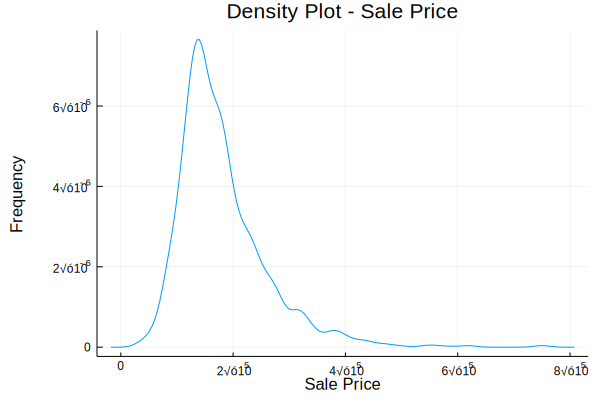

In [14]:
density(
    df_train.SalePrice , 
    title = "Density Plot - Sale Price", 
    ylabel = "Frequency", xlabel = "Sale Price", legend = false)

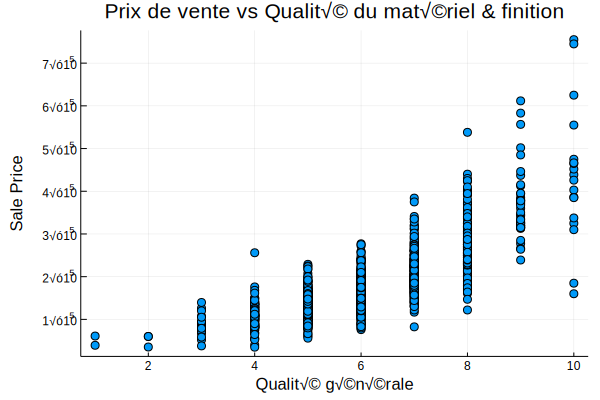

In [15]:
scatter(
    df_train.OverallQual,
    df_train.SalePrice, 
    title = "Prix de vente vs Qualit√© du mat√©riel & finition", 
    ylabel = "Sale Price", xlabel = "Qualit√© g√©n√©rale",legend = false)

Plus les mat√©riaux et la finition de la maison sont de bonne qualit√©, plus ch√®re est la maison. Nous pouvons voir que les maisons avec les meilleures finitions ont les prix les plus √©lev√©s.

In [16]:
head(describe(df_train), 5)

5√ó8 DataFrame. Omitted printing of 1 columns
‚îÇ Row ‚îÇ variable    ‚îÇ mean    ‚îÇ min     ‚îÇ median ‚îÇ max    ‚îÇ nunique ‚îÇ nmissing ‚îÇ
‚îÇ     ‚îÇ Symbol      ‚îÇ Union‚Ä¶  ‚îÇ Any     ‚îÇ Union‚Ä¶ ‚îÇ Any    ‚îÇ Union‚Ä¶  ‚îÇ Nothing  ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ 1   ‚îÇ MSSubClass  ‚îÇ 56.8973 ‚îÇ 20      ‚îÇ 50.0   ‚îÇ 190    ‚îÇ         ‚îÇ          ‚îÇ
‚îÇ 2   ‚îÇ MSZoning    ‚îÇ         ‚îÇ C (all) ‚îÇ        ‚îÇ RM     ‚îÇ 5       ‚îÇ          ‚îÇ
‚îÇ 3   ‚îÇ LotFrontage ‚îÇ         ‚îÇ 100     ‚îÇ        ‚îÇ NA     ‚îÇ 111     ‚îÇ          ‚îÇ
‚îÇ 4   ‚îÇ LotArea     ‚îÇ 10516.8 ‚îÇ 1300    ‚îÇ 9478.5 ‚îÇ 215245 ‚îÇ         ‚îÇ          ‚îÇ
‚îÇ 5   ‚îÇ Street      ‚îÇ         ‚îÇ Grvl    ‚îÇ        ‚îÇ Pave   ‚îÇ 2       ‚îÇ          ‚îÇ

Bien qu'il existe des valeurs manquantes dans le jeu de donn√©es, la colonne *nmissing* (nombre de valeurs manquantes par colonnes) n'affiche rien.

 > *Julia* consid√®re que les valeurs manquantes sont repr√©sent√©es par l'objet manquant `missing` plut√¥t que par `NA`; Avec la fonction `allowmissing`, on autorise prise en charge des valeurs manquantes. Apr√®s, on remplace tous les `NA` par des objets `missing`.

In [17]:
allowmissing!(df_train);
df_train .= ifelse.(df_train .== "NA" , missing, df_train);

In [18]:
description = describe(df_train)

80√ó8 DataFrame. Omitted printing of 2 columns
‚îÇ Row ‚îÇ variable      ‚îÇ mean      ‚îÇ min     ‚îÇ median   ‚îÇ max     ‚îÇ nunique ‚îÇ
‚îÇ     ‚îÇ Symbol        ‚îÇ Union‚Ä¶    ‚îÇ Any     ‚îÇ Union‚Ä¶   ‚îÇ Any     ‚îÇ Union‚Ä¶  ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ 1   ‚îÇ MSSubClass    ‚îÇ 56.8973   ‚îÇ 20      ‚îÇ 50.0     ‚îÇ 190     ‚îÇ         ‚îÇ
‚îÇ 2   ‚îÇ MSZoning      ‚îÇ           ‚îÇ C (all) ‚îÇ          ‚îÇ RM      ‚îÇ 5       ‚îÇ
‚îÇ 3   ‚îÇ LotFrontage   ‚îÇ           ‚îÇ 100     ‚îÇ          ‚îÇ 99      ‚îÇ 110     ‚îÇ
‚îÇ 4   ‚îÇ LotArea       ‚îÇ 10516.8   ‚îÇ 1300    ‚îÇ 9478.5   ‚îÇ 215245  ‚îÇ         ‚îÇ
‚îÇ 5   ‚îÇ Street        ‚îÇ           ‚îÇ Grvl    ‚îÇ          ‚îÇ Pave    ‚îÇ 2       ‚îÇ
‚îÇ 6   ‚îÇ Alley         ‚îÇ           ‚îÇ Grvl    ‚îÇ          ‚îÇ Pave    ‚îÇ 2       ‚îÇ
‚îÇ 7   ‚îÇ LotShape      ‚îÇ           ‚îÇ IR1     ‚îÇ          ‚îÇ Reg     ‚îÇ 4       ‚îÇ
‚îÇ 8   ‚îÇ LandContour   ‚îÇ           ‚îÇ Bnk     ‚îÇ          ‚îÇ Lvl     ‚îÇ 4       ‚îÇ
‚îÇ 9   ‚îÇ Utilities     ‚îÇ           ‚îÇ AllPub  ‚îÇ          ‚îÇ NoSeWa  ‚îÇ 2       ‚îÇ
‚îÇ 10  ‚îÇ LotConfig     ‚îÇ           ‚îÇ Corner  ‚îÇ          ‚îÇ Inside  ‚îÇ 5       ‚îÇ
‚ãÆ
‚îÇ 70  ‚îÇ ScreenPorch   ‚îÇ 15.061    ‚îÇ 0       ‚îÇ 0.0      ‚îÇ 480     ‚îÇ         ‚îÇ
‚îÇ 71  ‚îÇ PoolArea      ‚îÇ 2.7589    ‚îÇ 0       ‚îÇ 0.0      ‚îÇ 738     ‚îÇ         ‚îÇ
‚îÇ 72  ‚îÇ PoolQC        ‚îÇ           ‚îÇ Ex      ‚îÇ          ‚îÇ Gd      ‚îÇ 3       ‚îÇ
‚îÇ 73  ‚îÇ Fence         ‚îÇ           ‚îÇ GdPrv   ‚îÇ          ‚îÇ MnWw    ‚îÇ 4       ‚îÇ
‚îÇ 74  ‚îÇ MiscFeature   ‚îÇ           ‚îÇ Gar2    ‚îÇ          ‚îÇ TenC    ‚îÇ 4       ‚îÇ
‚îÇ 75  ‚îÇ MiscVal       ‚îÇ 43.489    ‚îÇ 0       ‚îÇ 0.0      ‚îÇ 15500   ‚îÇ         ‚îÇ
‚îÇ 76  ‚îÇ MoSold        ‚îÇ 6.32192   ‚îÇ 1       ‚îÇ 6.0      ‚îÇ 12      ‚îÇ         ‚îÇ
‚îÇ 77  ‚îÇ YrSold        ‚îÇ 2007.82   ‚îÇ 2006    ‚îÇ 2008.0   ‚îÇ 2010    ‚îÇ         ‚îÇ
‚îÇ 78  ‚îÇ SaleType      ‚îÇ           ‚îÇ COD     ‚îÇ          ‚îÇ WD      ‚îÇ 9       ‚îÇ
‚îÇ 79  ‚îÇ SaleCondition ‚îÇ           ‚îÇ Abnorml ‚îÇ          ‚îÇ Partial ‚îÇ 6       ‚îÇ
‚îÇ 80  ‚îÇ SalePrice     ‚îÇ 1.80921e5 ‚îÇ 34900   ‚îÇ 163000.0 ‚îÇ 755000  ‚îÇ         ‚îÇ

Avec le r√©sultat de la fonction `describe`, on s'aper√ßoit que les colonnes ont deux types. Ce qui nous donne par la premi√®re variable par exemple `Union{Missing, Int64}` puisqu'elle poss√®de des entiers et des valeurs manquantes.

In [19]:
sort(description[description.nmissing .!= nothing,:], :nmissing, rev=true)[1:7,:]

7√ó8 DataFrame. Omitted printing of 1 columns
‚îÇ Row ‚îÇ variable    ‚îÇ mean   ‚îÇ min    ‚îÇ median ‚îÇ max    ‚îÇ nunique ‚îÇ nmissing ‚îÇ
‚îÇ     ‚îÇ Symbol      ‚îÇ Union‚Ä¶ ‚îÇ Any    ‚îÇ Union‚Ä¶ ‚îÇ Any    ‚îÇ Union‚Ä¶  ‚îÇ Int64    ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ 1   ‚îÇ PoolQC      ‚îÇ        ‚îÇ Ex     ‚îÇ        ‚îÇ Gd     ‚îÇ 3       ‚îÇ 1453     ‚îÇ
‚îÇ 2   ‚îÇ MiscFeature ‚îÇ        ‚îÇ Gar2   ‚îÇ        ‚îÇ TenC   ‚îÇ 4       ‚îÇ 1406     ‚îÇ
‚îÇ 3   ‚îÇ Alley       ‚îÇ        ‚îÇ Grvl   ‚îÇ        ‚îÇ Pave   ‚îÇ 2       ‚îÇ 1369     ‚îÇ
‚îÇ 4   ‚îÇ Fence       ‚îÇ        ‚îÇ GdPrv  ‚îÇ        ‚îÇ MnWw   ‚îÇ 4       ‚îÇ 1179     ‚îÇ
‚îÇ 5   ‚îÇ FireplaceQu ‚îÇ        ‚îÇ Ex     ‚îÇ        ‚îÇ TA     ‚îÇ 5       ‚îÇ 690      ‚îÇ
‚îÇ 6   ‚îÇ LotFrontage ‚îÇ        ‚îÇ 100    ‚îÇ        ‚îÇ 99     ‚îÇ 110     ‚îÇ 259      ‚îÇ
‚îÇ 7   ‚îÇ GarageType  ‚îÇ        ‚îÇ 2Types ‚îÇ        ‚îÇ Detchd ‚îÇ 6       ‚îÇ 81       ‚îÇ

Le code ci dessus nous permet de ranger  les variables selon le nombre de valeurs manquantes qu'elles ont. On peut normalment supprimer les 5 premi√®res variables du classement vu le nombre de valeurs manquantes qu'elles poss√®dent.

In [20]:
select!(df_train, Not([:PoolQC , :MiscFeature, :Alley, :Fence, :FireplaceQu]));
select!(df_test, Not([:PoolQC , :MiscFeature, :Alley, :Fence, :FireplaceQu]));

Pour les variables restantes, nous imputerons les valeurs manquantes. Pour ce faire,
nous choisirons m√©thode `locf` (remplace la donn√©e manquante par la derni√®re observation) du pakage `Impute` [plus de d√©tails ici](https://invenia.github.io/Impute.jl/latest/api/imputation/).

In [21]:
Impute.locf!(df_train);

In [22]:
head(describe(df_train), 5)

5√ó8 DataFrame. Omitted printing of 1 columns
‚îÇ Row ‚îÇ variable    ‚îÇ mean    ‚îÇ min     ‚îÇ median ‚îÇ max    ‚îÇ nunique ‚îÇ nmissing ‚îÇ
‚îÇ     ‚îÇ Symbol      ‚îÇ Union‚Ä¶  ‚îÇ Any     ‚îÇ Union‚Ä¶ ‚îÇ Any    ‚îÇ Union‚Ä¶  ‚îÇ Int64    ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ 1   ‚îÇ MSSubClass  ‚îÇ 56.8973 ‚îÇ 20      ‚îÇ 50.0   ‚îÇ 190    ‚îÇ         ‚îÇ 0        ‚îÇ
‚îÇ 2   ‚îÇ MSZoning    ‚îÇ         ‚îÇ C (all) ‚îÇ        ‚îÇ RM     ‚îÇ 5       ‚îÇ 0        ‚îÇ
‚îÇ 3   ‚îÇ LotFrontage ‚îÇ         ‚îÇ 100     ‚îÇ        ‚îÇ 99     ‚îÇ 110     ‚îÇ 0        ‚îÇ
‚îÇ 4   ‚îÇ LotArea     ‚îÇ 10516.8 ‚îÇ 1300    ‚îÇ 9478.5 ‚îÇ 215245 ‚îÇ         ‚îÇ 0        ‚îÇ
‚îÇ 5   ‚îÇ Street      ‚îÇ         ‚îÇ Grvl    ‚îÇ        ‚îÇ Pave   ‚îÇ 2       ‚îÇ 0        ‚îÇ

Apr√®s avoir remplac√© l'ensemble des valeurs manquantes, nous devons retirer le type `missing` des types autoris√©s pour les colonnes. Cela ce fait avec la fonction `something`. Il n'existe pas beaucoup de mod√®les qui permettent le type `missing` dans les types de donn√©es autoris√©es.

In [23]:
df_train  = something.(df_train);

In [24]:
variables_quantitatives = Vector{String}()

String[]

In [25]:
for name in names(df_train)
    if typeof(df_train[name]).parameters[1] != String
        push!(variables_quantitatives, name);
    end
end

Pour le partitionnement des donn√©es, on peut utiliser la fonction `TrainTestSplit` du package `Lathe` ou de `ScikitLearn` dont l'utilisation est semblable √† celui de python.
<br>

Nous utilis√©rons seulement les variables quantitatives pour notre regression. Je sais ü•±, c'est pas trop top mais dans une prochaine section nous verrons comment encoder les variables qualitativesüòÅ.

* ##### Partitionnement des donn√©es 

In [26]:
traindf, testdf = TrainTestSplit(df_train[variables_quantitatives],.80);

In [27]:
y = convert(Array, traindf[!,:SalePrice]);
X = convert(Array, select(traindf, Not(:SalePrice)));

In [28]:
Xsh,ysh = shuffleobs((permutedims(X), y));

In [29]:
# Split data 
(X_train, y_train), (X_test, y_test) = splitobs((Xsh, ysh); at=0.80);

In [30]:
X_train = Array(permutedims(X_train));
y_train = Array(y_train);
X_test = Array(permutedims(X_test));
y_test = Array(y_test);

Notre mod√®le de machine learning se fera avec `ScikitLearn`, et oui üòâ; On pourrait aussi le faire avec `GLM` qui rapppelle R √©videmment. 
<br>
C'est √ßa... *Julia* ü•∞, tout le monde se sens √† la maison ü¶æ

In [31]:
using ScikitLearn: fit!, predict
using ScikitLearn.Models: LinearRegression

In [32]:
lreg = LinearRegression(multi_output=false)

LinearRegression{Matrix{Float64}, Float64}(#undef, #undef)

In [33]:
fit!(lreg, X_train, y_train)

LinearRegression{Matrix{Float64}, Float64}([-132.9756682737147; 0.537355108058441; ‚Ä¶ ; -26.82747165210753; -1474.1046916578152;;], [1.7721748083622644e6])

* ##### Pr√©diction √† l'aide du mod√®le obtenu

In [34]:
y_pred = predict(lreg, X_test);

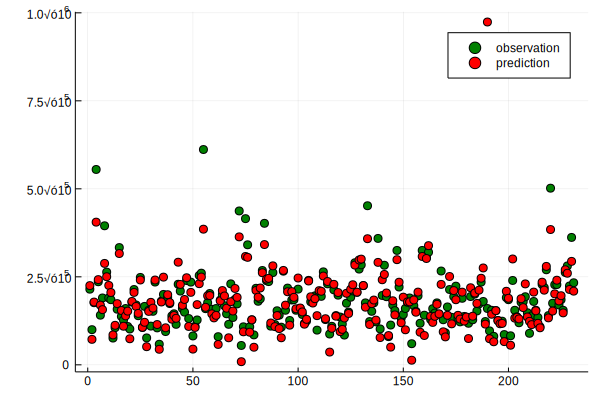

In [35]:
x = 1:231
y2 = [y_test, y_pred]
plot(x, y2, seriestype = :scatter,
    color = [:green :red],
    label=["observation" "prediction"])

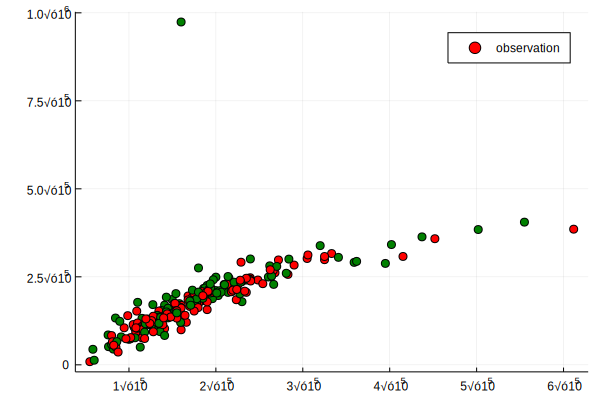

In [36]:
plot(y_test, y_pred, seriestype = :scatter, 
    color=[:red, :green], 
    label=["observation" "prediction"])

Comme vous pouvez le voir, *Julia* est un langage assez puissant qui pour moi serait sinon est une r√©elle alternative √† Python pour le machine learning.